In [3]:
from rossby_waves import *
from math import floor
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from rossby_waves.rossby_waves import amplitude, dispersion, grid, trajectory, vel, vel_autocor, traj2
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
r = RossbyWave(np.array([5, 5]))
ro = RossbyOcean([r])
ro.add_grid_waves()
ro.remove_wave(0)
x = grid(100)
t = np.linspace(0, 5e11,201)


In [4]:
x0 = np.array([[-np.pi,-np.pi]])
xcoords, ycoords = traj2(ro,x0,0,5e11, 2.5e9, 0)

In [13]:
x = np.array(xcoords)

In [20]:
dist = (x[:,200] - x[:,0])

In [24]:
for i in range(len(dist)):
    dist[i] = np.mod((np.pi)*2,dist[i])


In [25]:
print(dist)

[0.17973043 0.90909232 0.78940227 ... 1.10706566 1.30448268 0.74529093]


In [27]:
min(dist)

1.6751302426953885e-05

In [18]:
xcoords, ycoords = trajectory(ro,x,0,5e11, 2.5e9, 0)

In [74]:
ro.waves

[RossbyWave([-5.0, -5.0], 1.3948242308852552, 2e-11),
 RossbyWave([-5.0, -4.0], 5.470972432660289, 2e-11),
 RossbyWave([-5.0, -3.0], 1.2988547595412585, 2e-11),
 RossbyWave([-5.0, -2.0], 5.771802559770448, 2e-11),
 RossbyWave([-5.0, -1.0], 3.0687780052977853, 2e-11),
 RossbyWave([-5.0, 0.0], 3.8437000511471866, 2e-11),
 RossbyWave([-5.0, 1.0], 4.81234099049053, 2e-11),
 RossbyWave([-5.0, 2.0], 3.257316284380882, 2e-11),
 RossbyWave([-5.0, 3.0], 1.8648525506672493, 2e-11),
 RossbyWave([-5.0, 4.0], 1.1794872657700757, 2e-11),
 RossbyWave([-5.0, 5.0], 0.5073123535864998, 2e-11),
 RossbyWave([-4.0, -5.0], 4.63975721930671, 2e-11),
 RossbyWave([-4.0, -4.0], 2.7728276252226935, 2e-11),
 RossbyWave([-4.0, -3.0], 0.994690234793674, 2e-11),
 RossbyWave([-4.0, -2.0], 5.5288074256871, 2e-11),
 RossbyWave([-4.0, -1.0], 1.722136030886382, 2e-11),
 RossbyWave([-4.0, 0.0], 2.6027153856093173, 2e-11),
 RossbyWave([-4.0, 1.0], 1.860325083102777, 2e-11),
 RossbyWave([-4.0, 2.0], 3.950790950403746, 2e-11

In [29]:
np.shape(xcoords)

(1, 201)

In [13]:
np.shape(c[0,:])

(201,)

In [30]:
b = np.random.randint(0,10000,10)

In [28]:
c = np.array(xcoords)
d = np.array(ycoords)

In [19]:
b[1]

4210

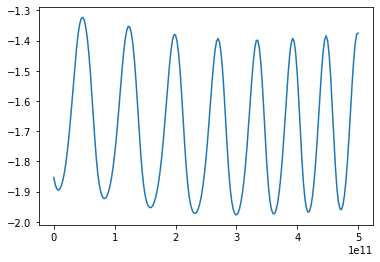

In [35]:
plt.plot(t,d[b[4]].T)

In [121]:
with open("0.001.bin", 'rb') as f:
    data = np.array(pickle.load(f))

In [100]:
np.shape(data)

(2, 10000, 201)

In [114]:
xcoords = data[0]
ycoords = data[1]

In [102]:
np.shape(xcoords)

(10000, 201)

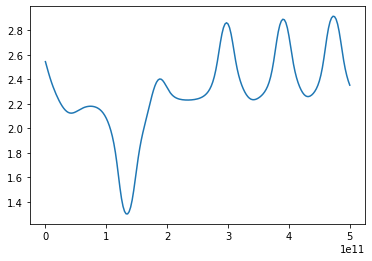

In [36]:
plt.plot(t,ycoords[b[6]])

In [83]:
np.shape(xcoords[b[0]])

(201,)

In [48]:
np.shape(xcoords)

(10000, 201)

In [53]:
def dxt2(data):
    x = np.array(data)
    a = []

    for j in range(201):
        
        y = x[:,j] - x[:,0]
        b = np.dot(y,y)
        a.append(b/10000)
    return a

In [55]:
t = np.linspace(0,5e11,201)

In [72]:
p = dxt2(xcoords)

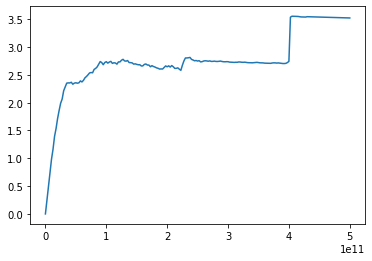

In [73]:
plt.plot(t,p)

In [84]:
initial = np.vstack((np.array(xcoords)[:,0],np.array(ycoords)[:,0])).T


In [85]:
np.shape(initial)

(10000, 2)

In [7]:
xcoords, ycoords = traj2(ro,x,0,5e11, 2.5e9, eps=0)


In [8]:
def f(data1,data2, i,t,e):
    initial = np.vstack((np.array(xcoords)[:,0],np.array(ycoords)[:,0])).T
    final = np.vstack((np.array(xcoords)[:,i],np.array(ycoords)[:,i])).T
    u = vel(ro, initial, 0, eps=e)
    v = vel(ro, final, t, eps=e)
    a = 0
    b = 0
    for i in range(np.shape(v)[0]):
        a += (np.dot(u[i], v[i]))
        b += np.dot(v[i], v[i])
    return (a / b) * np.shape(v)[0]


In [111]:
f(xcoords,ycoords,200,t[200],0)

-3304.3146767676503

In [9]:
arr = []
for i in range(201):
    arr.append(f(xcoords,ycoords,i,t[i],0))


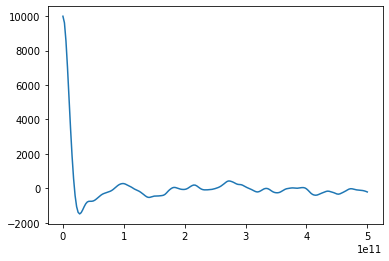

In [10]:
plt.plot(t,arr)

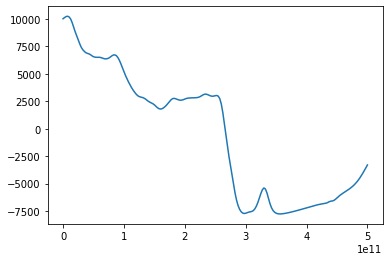

In [113]:
plt.plot(t,arr)

<bound method Figure.show of <Figure size 6480x720 with 1 Axes>>

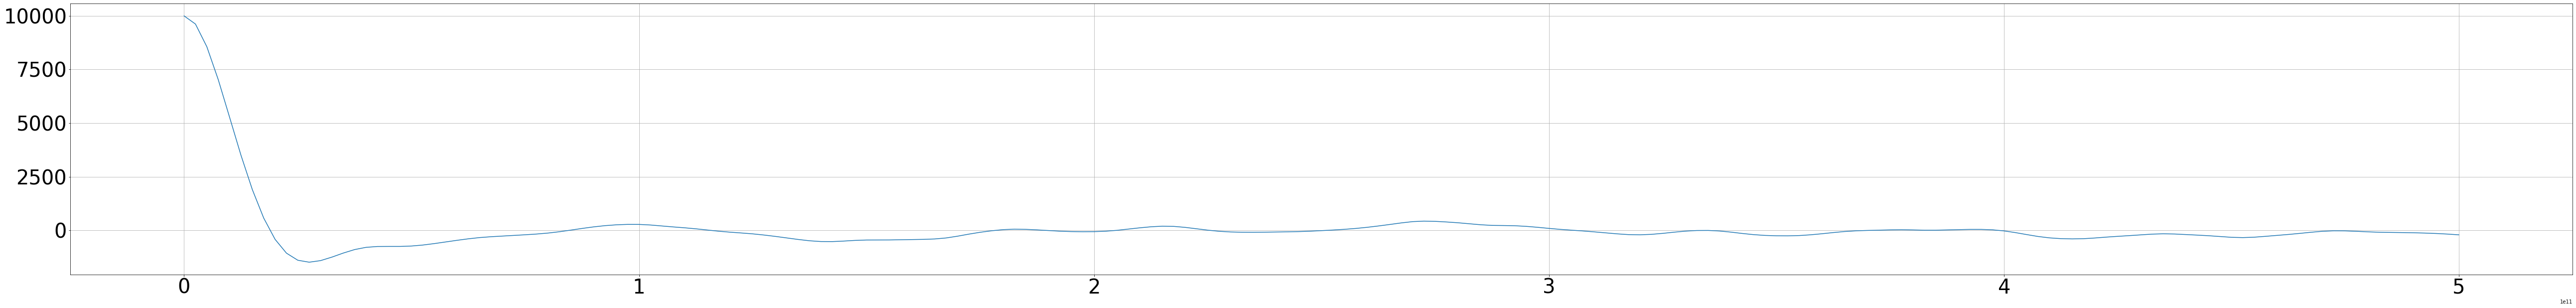

In [11]:
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
